In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

pd.set_option("mode.copy_on_write", True)

In [39]:
df_list = []
df1 = pd.read_csv("100_data/102_processed/real_testing_data.csv")
df2 = pd.read_csv("100_data/102_processed/real_training_data.csv")
df_list = [df1, df2]
df = pd.concat(df_list)
df
# df["UTC_Time"] = pd.to_datetime(df["UTC_Time"])

,Unnamed: 0,Date,Tweet_Content,Manual_Testing_Labels,Manual_Training_Labels
0,0,2020-02-07,Find out why electric vehicles are a smart tra...,POSITIVE,NaN
1,1,2020-02-08,How Soon Will Electric Vehicles Kill The Gasol...,NEUTRAL,NaN
2,2,2020-02-18,AI delivers a battery boost to electric vehicl...,NEUTRAL,NaN
3,3,2020-03-04,There is so much anti-electric vehicles propag...,POSITIVE,NaN
4,4,2020-03-17,With the purchase of fully electric vehicles a...,NEUTRAL,NaN
...,...,...,...,...,...
195,195,2022-10-23,Thank you President Biden for investing in the...,NaN,POSITIVE
196,196,2022-05-30,Rivian R1T Owner Attempts To Calculate Real-Wo...,NaN,NEUTRAL
197,197,2022-06-27,"Last year, electric vehicle sales reached a re...",NaN,POSITIVE
198,198,2022-01-06,Not sure how long people would have survived i...,NaN,NEGATIVE


In [9]:
df3 = pd.read_csv("../100_data/102_processed/combined_file.csv")
df3["UTC_Time"] = pd.to_datetime(df3["UTC_Time"])
df3

/var/folders/p9/g53kwws96012dz5gy8wnx12m0000gn/T/ipykernel_17928/3147894088.py:1: DtypeWarning: Columns (22,23,24,25,26) have mixed types. Specify dtype option on import or set low_memory=False.
  df3 = pd.read_csv("../100_data/102_processed/combined_file.csv")


,Keyword,Post_URL,Author_Name,Author_Web_Page_URL,Author_Handle,Verified_Status,UTC_Time,Ads,Tweet_Content,Post_ID,...,Reply_to_Whom,Reply_to_Whom_URL,Reply_to_Whom_Username,Reply_to_Whom_Handle,Language,Unnamed: 9,AI Label,Label,Labels,LABELS
0,electric vehicles,"https://x.com/search?q=""electric vehicles"" lan...",Tomas Marquez,https://x.com/TomasMa16498730,TomasMa16498730,False,2023-01-01 01:56:24+00:00,False,"Free unlimited data, calls, text with an ID ca...",1.609368e+18,...,NaN,NaN,NaN,NaN,en,NaN,NaN,NaN,NaN,NaN
1,electric vehicles,"https://x.com/search?q=""electric vehicles"" lan...",Ezer,https://x.com/EzerRatchaga,EzerRatchaga,False,2023-01-01 17:06:22+00:00,False,"👉 10 years of EV growth\n\nIn 2011, around 55,...",1.609597e+18,...,NaN,NaN,NaN,NaN,en,NaN,NaN,NaN,NaN,NaN
2,electric vehicles,"https://x.com/search?q=""electric vehicles"" lan...",CNBC,https://x.com/CNBC,CNBC,True,2023-01-01 13:42:00+00:00,False,The world’s first commercial solar electric ve...,1.609545e+18,...,NaN,NaN,NaN,NaN,en,NaN,NaN,NaN,NaN,NaN
3,electric vehicles,"https://x.com/search?q=""electric vehicles"" lan...",CNBC,https://x.com/CNBC,CNBC,True,2023-01-01 15:04:00+00:00,False,Nickel is a key component in most lithium-ion ...,1.609566e+18,...,NaN,NaN,NaN,NaN,en,NaN,NaN,NaN,NaN,NaN
4,electric vehicles,"https://x.com/search?q=""electric vehicles"" lan...",Mashable,https://x.com/mashable,mashable,True,2023-01-01 19:40:30+00:00,False,This experimental road is one very long charge...,1.609636e+18,...,NaN,NaN,NaN,NaN,en,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83622,Electric vehicles,"https://x.com/search?q=""Electric vehicles"" lan...",Stuff,https://x.com/NZStuff,NZStuff,False,2021-05-26 22:38:33+00:00,False,Electric vehicles to make up 40 per cent of Fo...,1.397684e+18,...,NaN,NaN,NaN,NaN,en,NaN,NaN,NaN,NaN,NaN
83623,Electric vehicles,"https://x.com/search?q=""Electric vehicles"" lan...",CityNews Montreal,https://x.com/CityNewsMTL,CityNewsMTL,False,2021-05-26 17:41:00+00:00,False,Ford: Electric vehicles to be 40% of global sa...,1.397609e+18,...,NaN,NaN,NaN,NaN,en,NaN,NaN,NaN,NaN,NaN
83624,Electric vehicles,"https://x.com/search?q=""Electric vehicles"" lan...",CityNews Montreal,https://x.com/CityNewsMTL,CityNewsMTL,False,2021-05-26 18:11:00+00:00,False,"Climate ambition, push for electric vehicles d...",1.397616e+18,...,NaN,NaN,NaN,NaN,en,NaN,NaN,NaN,NaN,NaN
83625,Electric vehicles,"https://x.com/search?q=""Electric vehicles"" lan...",Malay Mail,https://x.com/malaymail,malaymail,True,2021-05-26 15:05:53+00:00,False,Ford says 40pc of sales to be electric vehicle...,1.397570e+18,...,NaN,NaN,NaN,NaN,en,NaN,NaN,NaN,NaN,NaN


In [10]:
df3.loc[df3["Tweet_Content"].isna()]
new_df = df3.dropna(subset=["Tweet_Content"])
new_df.loc[new_df["Tweet_Content"].isna()]

,Keyword,Post_URL,Author_Name,Author_Web_Page_URL,Author_Handle,Verified_Status,UTC_Time,Ads,Tweet_Content,Post_ID,...,Reply_to_Whom,Reply_to_Whom_URL,Reply_to_Whom_Username,Reply_to_Whom_Handle,Language,Unnamed: 9,AI Label,Label,Labels,LABELS


In [12]:
nltk.download("vader_lexicon")
analyzer = SentimentIntensityAnalyzer()
list1 = []
counter = 0
for row in new_df["Tweet_Content"]:
    scores = analyzer.polarity_scores(row)
    list1.append(scores)
    counter += 1
    # print(row, scores, counter, sep="\n")
# total_score = {"pos": 0, "neu": 0, "neg": 0}
score_list = []
for score in list1:
    # if score["compound"] >= 0.5:
    #     total_score["pos"] += 1
    # elif score["compound"] <= -0.5:
    #     total_score["neg"] += 1
    # else:
    #     total_score["neu"] += 1
    score_list.append(score["compound"])
new_df["scores"] = score_list
new_df

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/fanxu/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,Keyword,Post_URL,Author_Name,Author_Web_Page_URL,Author_Handle,Verified_Status,UTC_Time,Ads,Tweet_Content,Post_ID,...,Reply_to_Whom_URL,Reply_to_Whom_Username,Reply_to_Whom_Handle,Language,Unnamed: 9,AI Label,Label,Labels,LABELS,scores
0,electric vehicles,"https://x.com/search?q=""electric vehicles"" lan...",Tomas Marquez,https://x.com/TomasMa16498730,TomasMa16498730,False,2023-01-01 01:56:24+00:00,False,"Free unlimited data, calls, text with an ID ca...",1.609368e+18,...,NaN,NaN,NaN,en,NaN,NaN,NaN,NaN,NaN,0.7650
1,electric vehicles,"https://x.com/search?q=""electric vehicles"" lan...",Ezer,https://x.com/EzerRatchaga,EzerRatchaga,False,2023-01-01 17:06:22+00:00,False,"👉 10 years of EV growth\n\nIn 2011, around 55,...",1.609597e+18,...,NaN,NaN,NaN,en,NaN,NaN,NaN,NaN,NaN,0.3818
2,electric vehicles,"https://x.com/search?q=""electric vehicles"" lan...",CNBC,https://x.com/CNBC,CNBC,True,2023-01-01 13:42:00+00:00,False,The world’s first commercial solar electric ve...,1.609545e+18,...,NaN,NaN,NaN,en,NaN,NaN,NaN,NaN,NaN,0.0000
3,electric vehicles,"https://x.com/search?q=""electric vehicles"" lan...",CNBC,https://x.com/CNBC,CNBC,True,2023-01-01 15:04:00+00:00,False,Nickel is a key component in most lithium-ion ...,1.609566e+18,...,NaN,NaN,NaN,en,NaN,NaN,NaN,NaN,NaN,0.0000
4,electric vehicles,"https://x.com/search?q=""electric vehicles"" lan...",Mashable,https://x.com/mashable,mashable,True,2023-01-01 19:40:30+00:00,False,This experimental road is one very long charge...,1.609636e+18,...,NaN,NaN,NaN,en,NaN,NaN,NaN,NaN,NaN,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83622,Electric vehicles,"https://x.com/search?q=""Electric vehicles"" lan...",Stuff,https://x.com/NZStuff,NZStuff,False,2021-05-26 22:38:33+00:00,False,Electric vehicles to make up 40 per cent of Fo...,1.397684e+18,...,NaN,NaN,NaN,en,NaN,NaN,NaN,NaN,NaN,0.0000
83623,Electric vehicles,"https://x.com/search?q=""Electric vehicles"" lan...",CityNews Montreal,https://x.com/CityNewsMTL,CityNewsMTL,False,2021-05-26 17:41:00+00:00,False,Ford: Electric vehicles to be 40% of global sa...,1.397609e+18,...,NaN,NaN,NaN,en,NaN,NaN,NaN,NaN,NaN,0.0000
83624,Electric vehicles,"https://x.com/search?q=""Electric vehicles"" lan...",CityNews Montreal,https://x.com/CityNewsMTL,CityNewsMTL,False,2021-05-26 18:11:00+00:00,False,"Climate ambition, push for electric vehicles d...",1.397616e+18,...,NaN,NaN,NaN,en,NaN,NaN,NaN,NaN,NaN,0.0000
83625,Electric vehicles,"https://x.com/search?q=""Electric vehicles"" lan...",Malay Mail,https://x.com/malaymail,malaymail,True,2021-05-26 15:05:53+00:00,False,Ford says 40pc of sales to be electric vehicle...,1.397570e+18,...,NaN,NaN,NaN,en,NaN,NaN,NaN,NaN,NaN,0.0000


In [13]:
new_df = new_df[["UTC_Time", "Tweet_Content", "scores"]]
new_df.loc[new_df["Tweet_Content"].duplicated(keep=False)]

,UTC_Time,Tweet_Content,scores
44,2023-01-01 19:49:31+00:00,The Mirage of Electric Vehicles https://t.co/5...,0.0000
52,2023-01-01 12:08:14+00:00,“A Back-of-the-Head Strike”: US Protectionism ...,0.0000
132,2023-01-02 21:00:00+00:00,Video: Fact vs Fiction - Electric Vehicles 🚗⚡ ...,0.0000
137,2023-01-02 21:09:00+00:00,Green growth and electric vehicles: the role o...,0.3818
181,2023-01-04 23:33:30+00:00,Loud noise #Pollution can lead to dementia. T...,0.0000
...,...,...,...
83433,2021-05-25 09:07:00+00:00,Fuel for thought: how electric vehicles can gi...,0.0000
83452,2021-05-25 19:09:00+00:00,Learn how we assessed air quality and climate ...,0.0000
83513,2021-05-26 23:02:01+00:00,ESFI: Understanding Electric Vehicles - Electr...,0.4215
83530,2021-05-26 15:04:00+00:00,"As #EVs become more common on roadways, they a...",-0.3804


In [102]:
new_df = new_df.loc[~new_df["UTC_Time"].isna()]

In [87]:
new_df = new_df.loc[new_df["scores"] != 0.0]

In [ ]:
df["vader_labels"] = pd.cut(
    df["scores"],
    bins=[-2, -0.5, 0.5, 1],
    labels=["Negative", "Neutral", "Positive"],
)

False    303
Name: count, dtype: int64

In [88]:
new_df["vader_labels"] = pd.cut(
    new_df["scores"],
    bins=[-2, -0.5, 0.5, 1],
    labels=["Negative", "Neutral", "Positive"],
)

In [89]:
df_col = df[["Unnamed: 0", "Date", "Tweet_Content", "vader_labels"]]
pivoted = df_col.pivot(
    index=["Unnamed: 0", "Date"],
    columns="vader_labels",
    values="Tweet_Content",
)
pivoted["date_time"] = pivoted.index
pivoted["date_time"] = pivoted.index.get_level_values(1)
pivoted["date_time"] = pd.to_datetime(pivoted["date_time"])
pivoted["year"] = pivoted["date_time"].dt.year
pivoted["month"] = pivoted["date_time"].dt.month
pivoted["half"] = [1 if x < 7 else 2 for x in pivoted["month"]]
pivoted = pivoted.groupby(["year", "month"]).count()
# pivoted = pivoted.groupby(["year", "half"]).count()
pivoted["Bi_Year"] = (
    pivoted.index.get_level_values(1).astype(str)
    + "-"
    + pivoted.index.get_level_values(0).astype(str)
)
pivoted

NameError: name 'df' is not defined

In [124]:
# df_col = df[["Unnamed: 0", "Date", "Tweet_Content", "vader_labels"]]
new_df = new_df.loc[~new_df["UTC_Time"].duplicated()]
pivoted = new_df.pivot(
    index="UTC_Time",
    columns="vader_labels",
    values="Tweet_Content",
)
pivoted["date_time"] = pivoted.index
# # pivoted["date_time"] = pivoted.index.get_level_values(1)
pivoted["date_time"] = pd.to_datetime(pivoted["date_time"])
pivoted["year"] = pivoted["date_time"].dt.year
pivoted["month"] = pivoted["date_time"].dt.month
# pivoted["half"] = [1 if x < 7 else 2 for x in pivoted["month"]]
pivoted = pivoted.groupby(["year", "month"], as_index=False).count()
# # pivoted = pivoted.groupby(["year", "half"]).count()
pivoted["month_year"] = (
    pd.to_datetime(pivoted["month"], format="%m").dt.month_name()
    + " "
    + pivoted["year"].astype(str)
)
pivoted

vader_labels,year,month,Negative,Neutral,Positive,date_time,month_year
0,2020,1,56,584,505,1145,January 2020
1,2020,2,54,574,523,1151,February 2020
2,2020,3,62,609,425,1096,March 2020
3,2020,4,61,546,513,1120,April 2020
4,2020,5,29,339,258,626,May 2020
5,2020,6,61,1037,882,1980,June 2020
6,2020,7,84,788,675,1547,July 2020
7,2020,8,98,1202,857,2157,August 2020
8,2020,9,32,288,305,625,September 2020
9,2021,1,110,1053,709,1872,January 2021


In [125]:
pivoted.loc[8.5] = [2020, None, None, None, None, None, "October 2020"]
pivoted.loc[8.6] = [2020, None, None, None, None, None, "November 2020"]
pivoted.loc[8.7] = [2020, None, None, None, None, None, "December 2020"]
pivoted.loc[18.1] = [2021, None, None, None, None, None, "November 2021"]
pivoted.loc[18.2] = [2021, None, None, None, None, None, "December 2021"]
pivoted.loc[28.1] = [2022, None, None, None, None, None, "November 2022"]
pivoted.loc[28.2] = [2022, None, None, None, None, None, "December 2022"]
pivoted.loc[31.1] = [2023, None, None, None, None, None, "April 2023"]
pivoted.loc[31.2] = [2023, None, None, None, None, None, "May 2023"]
pivoted.loc[35] = [2023, None, None, None, None, None, "September 2023"]
pivoted.loc[36] = [2023, None, None, None, None, None, "October 2023"]
pivoted.loc[37] = [2023, None, None, None, None, None, "November 2023"]
pivoted.loc[38] = [2023, None, None, None, None, None, "December 2023"]
# date_index = pd.date_range("01/01/2020", periods=48, freq="MS")
# pivoted.reindex(date_index)
pivoted = pivoted.sort_index().reset_index()
pivoted

vader_labels,index,year,month,Negative,Neutral,Positive,date_time,month_year
0,0.0,2020,1,56,584,505,1145,January 2020
1,1.0,2020,2,54,574,523,1151,February 2020
2,2.0,2020,3,62,609,425,1096,March 2020
3,3.0,2020,4,61,546,513,1120,April 2020
4,4.0,2020,5,29,339,258,626,May 2020
5,5.0,2020,6,61,1037,882,1980,June 2020
6,6.0,2020,7,84,788,675,1547,July 2020
7,7.0,2020,8,98,1202,857,2157,August 2020
8,8.0,2020,9,32,288,305,625,September 2020
9,8.5,2020,None,None,None,None,None,October 2020


In [ ]:
# df["sentiment"] = None
# df.loc[df["scores"] >= 0.5, "sentiment"] = "green"
# df.loc[df["scores"] <= -0.5, "sentiment"] = "red"
# df.loc[df["sentiment"].isnull(), "sentiment"] = "yellow"
# print(df["sentiment"].value_counts())
# df["vader_labels"].value_counts()

sentiment
yellow    204
green      83
red        16
Name: count, dtype: int64


vader_labels
Neutral     204
Positive     83
Negative     16
Name: count, dtype: int64

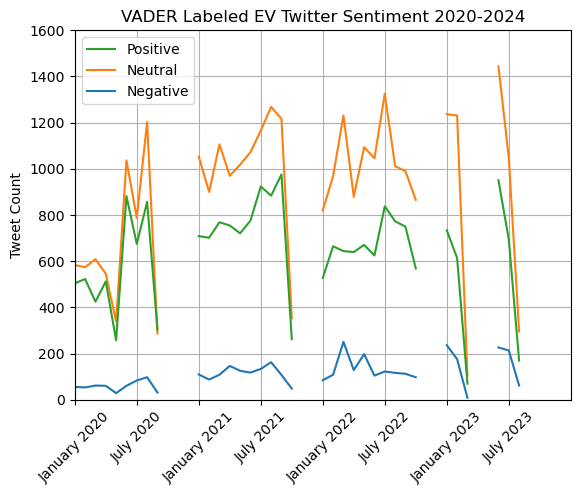

In [141]:
fig, ax = plt.subplots()
# Calculate the best-fit line
x = pivoted["month_year"]
y = pivoted["Negative"]
y1 = pivoted["Neutral"]
y2 = pivoted["Positive"]


(line1,) = ax.plot(x, y, label="Negative")
(line2,) = ax.plot(x, y1, label="Neutral")
(line3,) = ax.plot(x, y2, label="Positive")
ax.legend(handles=[line3, line2, line1])
plt.title("VADER Labeled EV Twitter Sentiment 2020-2024")
plt.ylabel("Tweet Count")
# Plot the scatter plot and the trend line
# plt.plot(x, y)
# plt.plot(x, y1)
# plt.plot(x, y2)  # 'r--' is for a red dashed line
ax.set(ylim=(0, 1600), xlim=(0, 48), xticks=np.arange(0, 48, 6))
# ax.tick_params(axis="x", labelrotation=45)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

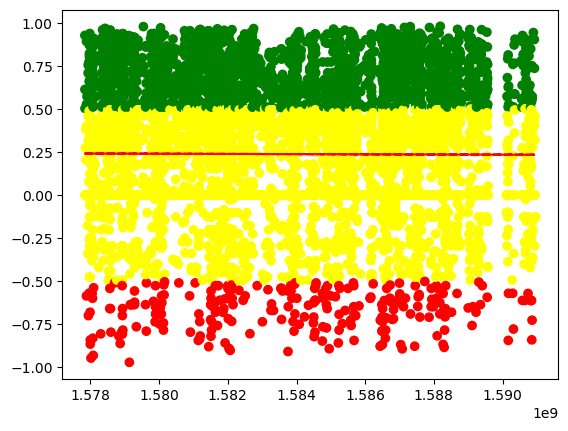

In [ ]:
fig, ax = plt.subplots()
# Calculate the best-fit line
x = df["UTC_Time"].astype("int64") // 10**9
y = df["compound_scores"]
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

# Plot the scatter plot and the trend line
plt.plot(x, p(x), "r--")  # 'r--' is for a red dashed line
ax.scatter(x, y, c=df["sentiment"])
plt.show()

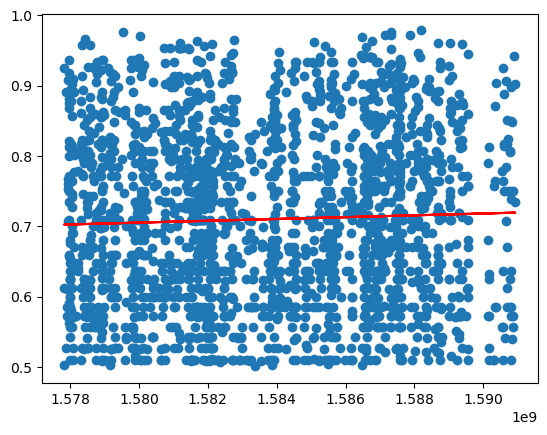

In [ ]:
df_pos = df.loc[df["sentiment"] == "green"]
fig, ax = plt.subplots()

x = df_pos["UTC_Time"].astype("int64") // 10**9
y = df_pos["compound_scores"]
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

plt.plot(x, p(x), "r-")  # 'r--' is for a red dashed line
ax.scatter(x, y)
plt.show()

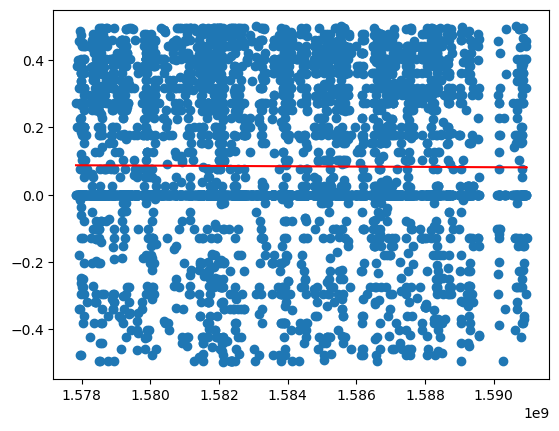

In [ ]:
df_pos = df.loc[df["sentiment"] == "yellow"]
fig, ax = plt.subplots()

x = df_pos["UTC_Time"].astype("int64") // 10**9
y = df_pos["compound_scores"]
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

plt.plot(x, p(x), "r-")  # 'r--' is for a red dashed line
ax.scatter(x, y)
plt.show()

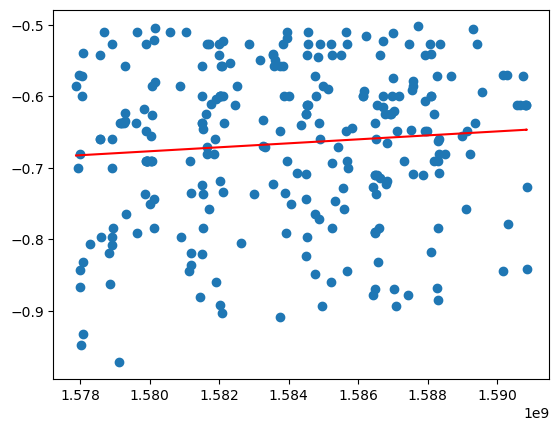

In [ ]:
df_pos = df.loc[df["sentiment"] == "red"]
fig, ax = plt.subplots()

x = df_pos["UTC_Time"].astype("int64") // 10**9
y = df_pos["compound_scores"]
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

plt.plot(x, p(x), "r-")  # 'r--' is for a red dashed line
ax.scatter(x, y)
plt.show()

In [4]:
df_grouped = df.groupby(df["UTC_Time"].dt.month)["compound_scores"].mean()
df_grouped.index
fig, ax = plt.subplots()

x = df_grouped.index
y = df_grouped
# z = np.polyfit(x, y, 1)
# p = np.poly1d(z)

# plt.plot(x, p(x), "r-")  # 'r--' is for a red dashed line
ax.scatter(x, y)
plt.show()

NameError: name 'df' is not defined